In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame


In [3]:
nx_df = pd.read_csv('netflix_data.csv')

In [4]:
nx_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [5]:
nx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [6]:
nx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


**Observation** no missing information 
1) int61 value are columns 'release_year' and 'duration' 
2) 

In [7]:
nx_df['type'].value_counts(normalize=True)

type
Movie      0.971945
TV Show    0.028055
Name: proportion, dtype: float64

In [8]:
columns = ['type', 'country', 'genre']
result = {}

for cols in columns: 
    cols_value_count = nx_df[cols].value_counts()
    cols_percentage = nx_df[cols].value_counts(normalize=True) * 100
    cols_cumulative_percentage = cols_percentage.cumsum()
    result[cols] = pd.DataFrame({'Count': cols_value_count, 
                                 'Percentage': cols_percentage,
                                 'Cumulative Percentage': cols_cumulative_percentage})

result['type']

,Count,Percentage,Cumulative Percentage
type,,,
Movie,4677,97.194514,97.194514
TV Show,135,2.805486,100.000000


In [62]:
top_10_country = result['country'].head(10)

**Observation** 
- there are 72 countries in this database.
- top 10 countries accounted for 78.71% of the population
- top 15 countries accounted for 85.89% of the population  
- top 20 countries accounted for 90.83% of the population

**Note to follow up**
- I manually change the argument in head() function (e.g. 10, 15, 20) to get the answer, is there a way that I can do it faster? write a python script to display the information that I want 

In [63]:
top_20_country = result['country'].head(20)

In [51]:
top_20_country

,Count,Percentage,Cumulative Percentage
country,,,
United States,1886,39.193682,39.193682
India,864,17.955112,57.148795
United Kingdom,311,6.463009,63.611804
Canada,155,3.221114,66.832918
France,133,2.763924,69.596841
Spain,112,2.327515,71.924356
Egypt,91,1.891106,73.815461
Turkey,81,1.683292,75.498753
Japan,81,1.683292,77.182045


array([<Axes: ylabel='Count'>], dtype=object)

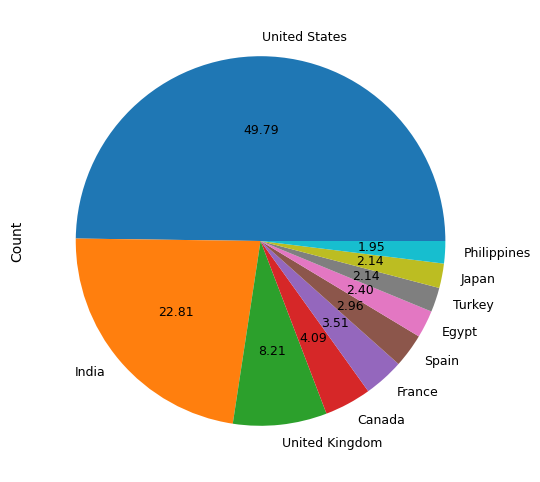

In [66]:
top_10_country['Count'].plot.pie(
    subplots=True,
    autopct="%.2f",
    fontsize=9,
    figsize=(6,6),
)

In [175]:
result['genre']

,Count,Percentage,Cumulative Percentage
genre,,,
Dramas,1343,27.909393,27.909393
Comedies,1029,21.384040,49.293433
Action,696,14.463840,63.757273
Children,421,8.748961,72.506234
Documentaries,352,7.315046,79.821280
Stand-Up,283,5.881131,85.702411
Horror Movies,239,4.966750,90.669160
International Movies,100,2.078138,92.747298
Classic Movies,69,1.433915,94.181214


In [69]:
nx_df[nx_df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas,2018
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children,2020
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas,2020


In [71]:
result['genre'].head(20)

,Count,Percentage,Cumulative Percentage
genre,,,
Dramas,NaN,NaN,NaN
Comedies,NaN,NaN,NaN
Action,NaN,NaN,NaN
Children,NaN,NaN,NaN
Documentaries,NaN,NaN,NaN
Stand-Up,NaN,NaN,NaN
Horror Movies,NaN,NaN,NaN
International Movies,NaN,NaN,NaN
Classic Movies,NaN,NaN,NaN


In [74]:
movie_genre_df = nx_df[nx_df['type'] == 'Movie']
movie_genre_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas,2018
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children,2020
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas,2020


In [179]:
movie_genre_df['date_added'].value_counts()

date_added
January 1, 2020       100
November 1, 2019       70
March 1, 2018          67
December 31, 2019      64
October 1, 2018        61
                     ... 
January 3, 2017         1
September 19, 2017      1
May 5, 2020             1
January 10, 2017        1
January 11, 2020        1
Name: count, Length: 1274, dtype: int64

In [77]:
movie_genre_ry_df = movie_genre_df.set_index('release_year')
movie_genre_ry_df

,show_id,type,title,director,cast,country,date_added,duration,description,genre,Year_Add
release_year,,,,,,,,,,,
2016,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
2011,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2009,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
2008,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",123,A brilliant group of students become card-coun...,Dramas,2020
2019,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...
2009,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",88,Looking to survive in a world taken over by zo...,Comedies,2019
2018,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",94,A drug dealer starts having doubts about his t...,Dramas,2018
2006,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",88,"Dragged from civilian life, a former superhero...",Children,2020


In [90]:
movie_genre_ry_df['country'].value_counts()

country
United States     1856
India              858
United Kingdom     289
Canada             151
France             129
                  ... 
Venezuela            1
Zimbabwe             1
Namibia              1
Soviet Union         1
Croatia              1
Name: count, Length: 72, dtype: int64

In [91]:
movie_genre_ry_df['genre'].value_counts()

genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 276
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Uncategorized             25
Independent Movies        20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Romantic Movies            3
LGBTQ Movies               1
Name: count, dtype: int64

In [128]:
movie_genre_ry_df.reset_index()


,release_year,show_id,type,title,director,cast,country,date_added,duration,description,genre,Year_Add
0,2016,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,2011,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,2009,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,2008,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",123,A brilliant group of students become card-coun...,Dramas,2020
4,2019,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4672,2009,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",88,Looking to survive in a world taken over by zo...,Comedies,2019
4673,2018,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",94,A drug dealer starts having doubts about his t...,Dramas,2018
4674,2006,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",88,"Dragged from civilian life, a former superhero...",Children,2020
4675,2005,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",99,When Lebanon's Civil War deprives Zozo of his ...,Dramas,2020


In [163]:
movie_genre_df = movie_genre_df.reset_index()

In [171]:
older_2011_df = movie_genre_df[movie_genre_df['release_year'] >2011] 
older_2011_df['release_year'].value_counts()

release_year
2017    628
2018    607
2016    552
2019    464
2020    345
2015    331
2014    217
2013    180
2012    146
2021      3
Name: count, dtype: int64

In [172]:
pivot_time_genre_df = older_2011_df.pivot_table(index='genre', columns = 'release_year', aggfunc='size', fill_value = 0)
pivot_time_genre_df 

release_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genre,,,,,,,,,,
Action,25,26,23,46,76,76,77,37,36,0
Anime Features,0,1,0,1,3,4,4,3,1,0
Children,14,20,24,16,36,38,42,43,60,1
Classic Movies,0,0,0,0,0,0,1,0,0,0
Comedies,45,42,55,72,109,128,126,98,68,1
Cult Movies,0,1,0,0,0,0,1,0,0,0
Documentaries,6,14,15,35,65,76,52,38,23,1
Dramas,36,54,59,121,182,186,187,142,87,0
Horror Movies,4,9,16,13,27,37,40,28,19,0


In [173]:
pivot_time_genre_df['Total'] = pivot_time_genre_df.sum(axis=1) 
pivot_time_genre_df['Total']

genre
Action                   422
Anime Features            17
Children                 294
Classic Movies             1
Comedies                 744
Cult Movies                2
Documentaries            325
Dramas                  1054
Horror Movies            193
Independent Movies        16
International Movies      82
LGBTQ Movies               1
Music                     12
Romantic Movies            3
Sci-Fi                     8
Stand-Up                 243
Thrillers                 38
Uncategorized             18
Name: Total, dtype: int64

In [174]:
pivot_time_genre_sorted = pivot_time_genre_df.sort_values(by='Total', ascending=False)
pivot_time_genre_sorted

release_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
genre,,,,,,,,,,,
Dramas,36,54,59,121,182,186,187,142,87,0,1054
Comedies,45,42,55,72,109,128,126,98,68,1,744
Action,25,26,23,46,76,76,77,37,36,0,422
Documentaries,6,14,15,35,65,76,52,38,23,1,325
Children,14,20,24,16,36,38,42,43,60,1,294
Stand-Up,12,8,9,15,25,52,46,40,36,0,243
Horror Movies,4,9,16,13,27,37,40,28,19,0,193
International Movies,3,2,9,6,16,12,7,19,8,0,82
Thrillers,0,0,1,3,6,8,7,10,3,0,38


In [ ]:
Dramas	1343	27.909393	27.909393
Comedies	1029	21.384040	49.293433
Action	696	14.463840	63.757273
Children	421	8.748961	72.506234
Documentaries	352	7.315046	79.821280
Stand-Up	283	5.881131	85.702411
Horror Movies	239	4.966750	90.669160

In [117]:
pivotdf = movie_genre_ry_df.pivot_table(index='country', columns = 'genre', aggfunc='size', fill_value = 0) 

In [118]:
first_genre_column = pivotdf.columns[0]

In [119]:
pivotdf['Total'] = pivotdf.sum(axis=1)

In [120]:
pivotdf_sorted = pivotdf.sort_values(by='Total', ascending= False).head(30)
pivotdf_sorted

genre,Action,Anime Features,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Music,Romantic Movies,Sci-Fi,Stand-Up,Thrillers,Uncategorized,Total
country,,,,,,,,,,,,,,,,,,,
United States,244,0,271,35,322,8,205,374,111,13,0,0,10,2,6,200,40,15,1856
India,127,0,18,9,250,1,6,378,29,1,34,0,0,0,0,5,0,0,858
United Kingdom,46,0,17,7,35,0,56,77,18,4,3,0,3,0,4,15,4,0,289
Canada,16,0,32,0,30,0,14,32,14,1,2,1,0,1,1,2,2,3,151
France,23,0,10,3,25,0,12,48,1,0,2,0,0,0,0,4,0,1,129
Spain,3,0,6,0,30,0,4,40,6,1,13,0,0,0,0,0,1,1,105
Egypt,13,0,1,6,50,0,0,17,3,0,1,0,0,0,0,0,0,0,91
Turkey,5,0,2,0,50,0,0,16,3,0,0,0,0,0,0,0,0,0,76
Philippines,5,0,0,0,24,0,0,32,4,0,9,0,0,0,0,0,0,0,74


In [113]:
pivotdf_sorted.describe()

genre,Action,Anime Features,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Music,Romantic Movies,Sci-Fi,Stand-Up,Thrillers,Uncategorized,Total
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,32.000000,0.90000,20.250000,3.200000,46.550000,0.500000,15.800000,59.850000,10.600000,1.000000,4.000000,0.050000,0.650000,0.15000,0.550000,13.250000,2.40000,1.250000,212.950000
std,57.752649,3.79612,59.567631,7.964394,83.915042,1.791794,46.240333,109.489858,24.737357,2.973568,7.786628,0.223607,2.300458,0.48936,1.571958,44.218209,8.90535,3.369757,427.070495
min,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,38.000000
25%,4.500000,0.00000,1.750000,0.000000,10.250000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,57.250000
50%,11.000000,0.00000,5.000000,0.000000,20.500000,0.000000,2.500000,21.000000,2.500000,0.000000,1.500000,0.000000,0.000000,0.00000,0.000000,2.000000,0.00000,0.000000,73.000000
75%,27.750000,0.00000,12.000000,3.000000,31.250000,0.000000,5.250000,40.250000,6.750000,0.250000,3.250000,0.000000,0.000000,0.00000,0.000000,5.500000,0.25000,1.000000,111.000000
max,244.000000,17.00000,271.000000,35.000000,322.000000,8.000000,205.000000,378.000000,111.000000,13.000000,34.000000,1.000000,10.000000,2.00000,6.000000,200.000000,40.00000,15.000000,1856.000000


In [107]:
summary_row = pd.DataFrame({
    'Total': pivotdf.sum(),
    'Min': pivotdf.min(),
    'Max': pivotdf.max(),
    'Median': pivotdf.median()
}, index=['Total', 'Min', 'Max', 'Median'])

summary_row

,Total,Min,Max,Median
Total,4677.0,1.0,1856.0,10.5
Min,NaN,NaN,NaN,NaN
Max,NaN,NaN,NaN,NaN
Median,NaN,NaN,NaN,NaN


In [108]:
pivotdf = pd.concat([pivotdf, summary_row])

In [ ]:
first_genre_column = pivotdf.columns[0]

In [110]:
pivot_df_sorted_top20 = pivotdf.iloc[:-4].sort_values(by=first_genre_column, ascending=False).head(20)
pivot_df_sorted_top20

,Action,Anime Features,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,...,Music,Romantic Movies,Sci-Fi,Stand-Up,Thrillers,Uncategorized,Total,Min,Max,Median
United States,244.0,0.0,271.0,35.0,322.0,8.0,205.0,374.0,111.0,13.0,...,10.0,2.0,6.0,200.0,40.0,15.0,1856.0,NaN,NaN,NaN
India,127.0,0.0,18.0,9.0,250.0,1.0,6.0,378.0,29.0,1.0,...,0.0,0.0,0.0,5.0,0.0,0.0,858.0,NaN,NaN,NaN
Hong Kong,49.0,0.0,1.0,0.0,14.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.0,NaN,NaN,NaN
United Kingdom,46.0,0.0,17.0,7.0,35.0,0.0,56.0,77.0,18.0,4.0,...,3.0,0.0,4.0,15.0,4.0,0.0,289.0,NaN,NaN,NaN
Japan,42.0,17.0,0.0,0.0,0.0,0.0,1.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,71.0,NaN,NaN,NaN
France,23.0,0.0,10.0,3.0,25.0,0.0,12.0,48.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,1.0,129.0,NaN,NaN,NaN
China,23.0,1.0,5.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,NaN,NaN,NaN
Canada,16.0,0.0,32.0,0.0,30.0,0.0,14.0,32.0,14.0,1.0,...,0.0,1.0,1.0,2.0,2.0,3.0,151.0,NaN,NaN,NaN
South Korea,14.0,0.0,2.0,0.0,4.0,0.0,0.0,11.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,38.0,NaN,NaN,NaN
Egypt,13.0,0.0,1.0,6.0,50.0,0.0,0.0,17.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,NaN,NaN,NaN


In [112]:
pivot_df_sorted_top20 = pd.concat([pivot_df_sorted_top20, summary_row])
pivot_df_sorted_top20

,Action,Anime Features,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Independent Movies,...,Music,Romantic Movies,Sci-Fi,Stand-Up,Thrillers,Uncategorized,Total,Min,Max,Median
United States,244.0,0.0,271.0,35.0,322.0,8.0,205.0,374.0,111.0,13.0,...,10.0,2.0,6.0,200.0,40.0,15.0,1856.0,NaN,NaN,NaN
India,127.0,0.0,18.0,9.0,250.0,1.0,6.0,378.0,29.0,1.0,...,0.0,0.0,0.0,5.0,0.0,0.0,858.0,NaN,NaN,NaN
Hong Kong,49.0,0.0,1.0,0.0,14.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.0,NaN,NaN,NaN
United Kingdom,46.0,0.0,17.0,7.0,35.0,0.0,56.0,77.0,18.0,4.0,...,3.0,0.0,4.0,15.0,4.0,0.0,289.0,NaN,NaN,NaN
Japan,42.0,17.0,0.0,0.0,0.0,0.0,1.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,71.0,NaN,NaN,NaN
France,23.0,0.0,10.0,3.0,25.0,0.0,12.0,48.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,1.0,129.0,NaN,NaN,NaN
China,23.0,1.0,5.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,NaN,NaN,NaN
Canada,16.0,0.0,32.0,0.0,30.0,0.0,14.0,32.0,14.0,1.0,...,0.0,1.0,1.0,2.0,2.0,3.0,151.0,NaN,NaN,NaN
South Korea,14.0,0.0,2.0,0.0,4.0,0.0,0.0,11.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,38.0,NaN,NaN,NaN
Egypt,13.0,0.0,1.0,6.0,50.0,0.0,0.0,17.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,NaN,NaN,NaN


In [85]:
movie_genre_ry_df[['genre', 'country']][movie_genre_ry_df['country'].cumsum() > 70].value_counts()

TypeError: '>' not supported between instances of 'str' and 'int'

- for genre column: will focus on the top 10 genre that account for 95% of the populatopn  
- for country column: will focus on the top 20 countries that account for 90% of the population  
- for type column: will focus on Movie as its cover 97% of the data  

In [11]:
nx_df['Year_Add'] = nx_df['date_added'].str[-4:]

In [12]:
nx_df['release_year'].value_counts()

release_year
2017    646
2018    624
2016    562
2019    488
2020    379
       ... 
1964      1
1963      1
1946      1
1945      1
1959      1
Name: count, Length: 71, dtype: int64

In [13]:
release_year_count =  nx_df['Year_Add'].value_counts().sort_index()
release_year_count

Year_Add
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     209
2017     754
2018    1114
2019    1337
2020    1229
2021      78
Name: count, dtype: int64

In [14]:
release_year_count.describe()

count      14.000000
mean      343.714286
std       519.338548
min         1.000000
25%         4.000000
50%        32.000000
75%       617.750000
max      1337.000000
Name: count, dtype: float64

<Axes: >

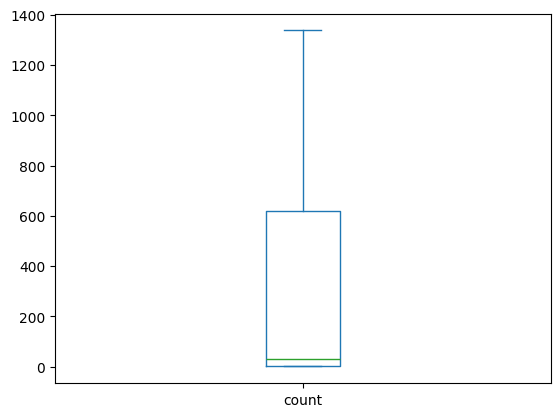

In [15]:
release_year_count.plot.box()


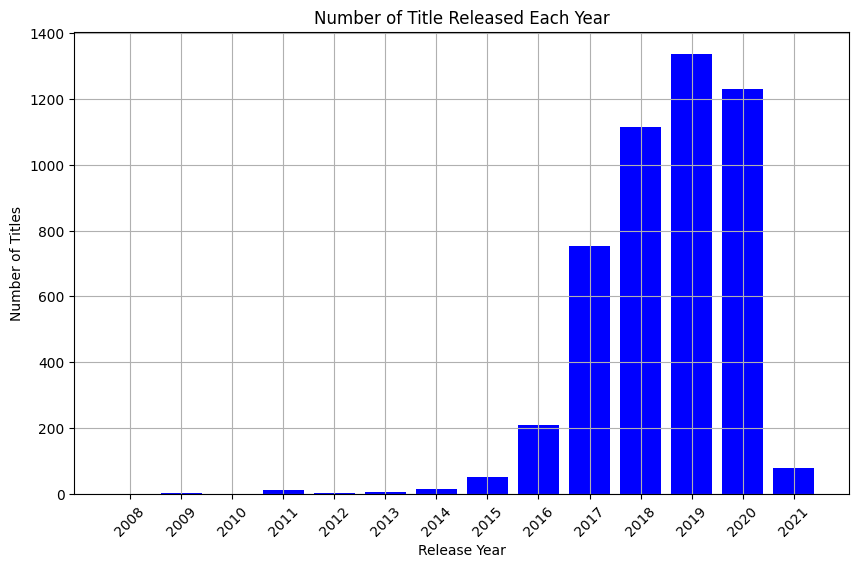

In [16]:
plt.figure(figsize=(10,6))
plt.bar(release_year_count.index, release_year_count.values, color='b') 
plt.title('Number of Title Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [17]:
videos_per_year = nx_df.groupby('Year_Add').size()
videos_per_year

Year_Add
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     209
2017     754
2018    1114
2019    1337
2020    1229
2021      78
dtype: int64

In [18]:
nx_df['type'].value_counts()

type
Movie      4677
TV Show     135
Name: count, dtype: int64

In [19]:
nx_df_movie = nx_df[nx_df['type'] == 'Movie']

In [20]:
nx_df_movie

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas,2018
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children,2020
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas,2020


In [21]:
nx_df_movie['duration'].mean()

102.3846482788112

In [22]:
nx_df_movie['duration'].describe()

count    4677.000000
mean      102.384648
std        26.428435
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [23]:
nx_df_movie_country_genre_index = nx_df_movie.set_index(['country', 'genre'])

In [24]:
nx_df_movie_country_genre_index['duration'].sort_index()

country    genre        
Argentina  Action            82
           Action           115
           Children          60
           Children          85
           Comedies          78
                           ... 
Vietnam    Action            97
           Comedies          92
           Documentaries     93
           Horror Movies    112
Zimbabwe   Comedies         100
Name: duration, Length: 4677, dtype: int64

In [25]:
nx_df_movie_country_genre_index['duration'].sort_index()

country    genre        
Argentina  Action            82
           Action           115
           Children          60
           Children          85
           Comedies          78
                           ... 
Vietnam    Action            97
           Comedies          92
           Documentaries     93
           Horror Movies    112
Zimbabwe   Comedies         100
Name: duration, Length: 4677, dtype: int64

In [26]:
usa_movies = nx_df_movie[nx_df_movie['country'] == 'United States']
usa_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,Year_Add
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,2020
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas,2019
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas,2017
11,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,91,Stranded when the Earth is suddenly destroyed ...,Independent Movies,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4793,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,101,Zack and Miri make and star in an adult film t...,Comedies,2018
4802,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,12,Born without legs and stuck in foster care for...,Documentaries,2018
4805,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,158,"A political cartoonist, a crime reporter and a...",Cult Movies,2019
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies,2019


In [27]:
usa_movies['duration'].describe()

count    1856.000000
mean       92.856142
std        23.646186
min         8.000000
25%        82.750000
50%        93.000000
75%       105.000000
max       209.000000
Name: duration, dtype: float64

<Axes: >

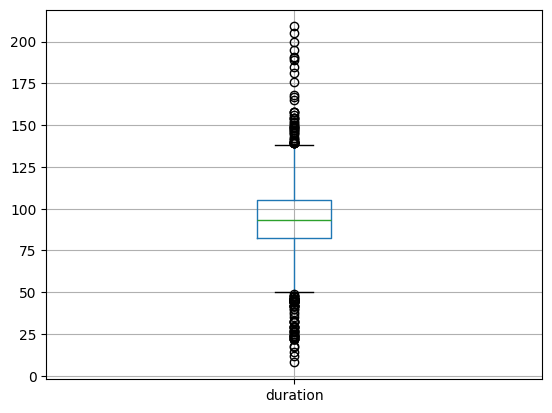

In [28]:
usa_movies.boxplot(['duration'])

In [29]:
usa_movies['genre'].value_counts()

genre
Dramas                374
Comedies              322
Children              271
Action                244
Documentaries         205
Stand-Up              200
Horror Movies         111
Thrillers              40
Classic Movies         35
Uncategorized          15
Independent Movies     13
Music                  10
Cult Movies             8
Sci-Fi                  6
Romantic Movies         2
Name: count, dtype: int64

In [30]:
usa_movies['duration'][usa_movies['genre'] == 'Dramas'].describe()

count    374.000000
mean     104.673797
std       20.784107
min        8.000000
25%       92.000000
50%      102.000000
75%      116.000000
max      209.000000
Name: duration, dtype: float64

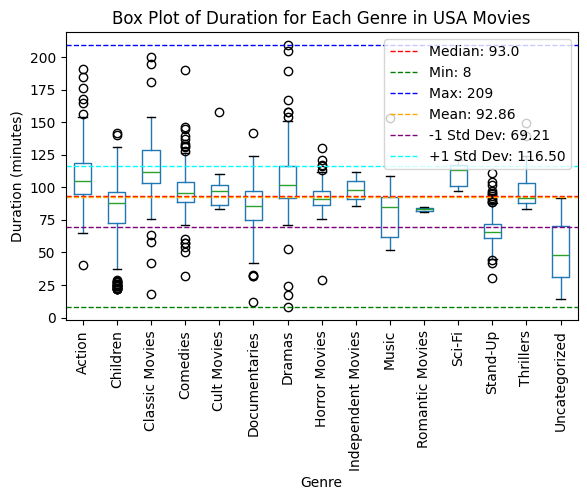

In [31]:
mean_duration = usa_movies['duration'].mean()
std_duration = usa_movies['duration'].std()

# Calculate -1 and +1 standard deviation from the mean
minus_1_std = mean_duration - std_duration
plus_1_std = mean_duration + std_duration

median_duration = usa_movies['duration'].median()
min_duration = usa_movies['duration'].min()
max_duration = usa_movies['duration'].max()

usa_movies.boxplot(column='duration', by='genre', grid=False, rot=45)
plt.axhline(median_duration, color='r', linestyle='--', linewidth=1, label=f'Median: {median_duration}')
plt.axhline(min_duration, color='g', linestyle='--', linewidth=1, label=f'Min: {min_duration}')
plt.axhline(max_duration, color='b', linestyle='--', linewidth=1, label=f'Max: {max_duration}')
plt.axhline(mean_duration, color='orange', linestyle='--', linewidth=1, label=f'Mean: {mean_duration:.2f}')
plt.axhline(minus_1_std, color='purple', linestyle='--', linewidth=1, label=f'-1 Std Dev: {minus_1_std:.2f}')
plt.axhline(plus_1_std, color='cyan', linestyle='--', linewidth=1, label=f'+1 Std Dev: {plus_1_std:.2f}')
plt.title('Box Plot of Duration for Each Genre in USA Movies')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.subplots_adjust(bottom=0.3)  # Adjust bottom to add more space for x labels
plt.legend()
plt.show()

In [34]:
nx_df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4677 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4677 non-null   object
 1   type          4677 non-null   object
 2   title         4677 non-null   object
 3   director      4677 non-null   object
 4   cast          4677 non-null   object
 5   country       4677 non-null   object
 6   date_added    4677 non-null   object
 7   release_year  4677 non-null   int64 
 8   duration      4677 non-null   int64 
 9   description   4677 non-null   object
 10  genre         4677 non-null   object
 11  Year_Add      4677 non-null   object
dtypes: int64(2), object(10)
memory usage: 475.0+ KB


<Axes: xlabel='country', ylabel='genre'>

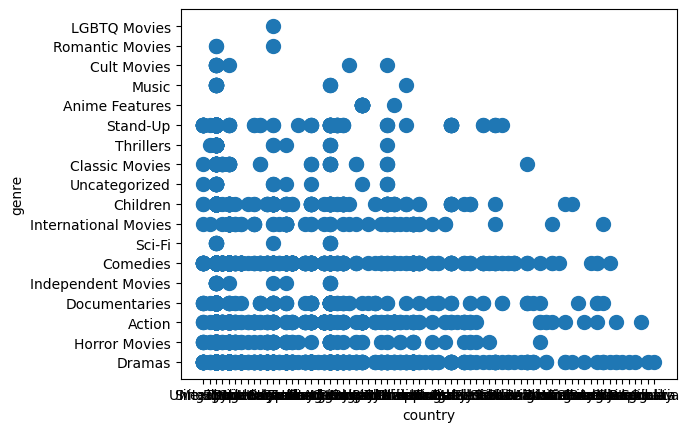

In [45]:
nx_df_movie.plot.scatter(x ='nx_df_movie['country'][a]', y = 'genre', s= 100)